# The Trapezoidal Rule and Fourier Coefficients

In this lecture we start to introduce the _discrete Fourier transform_ (DFT).  

The _Fourier series_ is an expansion

$$f(\theta) = \sum_{k=-\infty}^\infty \hat f_k e^{i k \theta}$$

where

$$\hat{f_k} := {1 \over 2 \pi} \int_0^{2\pi} f(\theta) e^{-i k \theta} d \theta$$

* We will explore calculating these coefficients using the Trapezoidal rule.  

* Note that the Trapezoidal rule for periodic functions satisfies (since $f(2 \pi) = f(0)$)

$$ {2 \pi \over n} \left[{f(0) \over 2} + \sum_{j=1}^{n-1} f(\theta_j) + {f(2 \pi) \over 2} \right] = {2 \pi \over n} \sum_{j=1}^n f(\theta_j)$$

where $\theta_j = h j = {2 \pi j \over n}$.  Thus define

$$Q_n[f] := {2 \pi \over n} \sum_{j=1}^n f(\theta_j)$$


$$\hat{f_k^n} := {1 \over 2 \pi} Q_n[f(\theta) e^{-i k \theta}]  = {1 \over n}\sum_{j=1}^n f(\theta_k) e^{-i k \theta_j}$$


## Observations about the first coefficient

The key to the DFT is based on the following observation.  

Consider $f(\theta) = cos 8 \theta$ and the first coefficient:
$$\hat f_0= {1 \over 2 \pi} \int_0^{2 \pi}\cos 8 \theta d \theta = {\sin 8*2 \pi - \sin 0 \over 8} = 0.$$

Let's approximate $\hat f_0$ by using Trapezoidal rule to approximate the integral.

Let's also compare to approximation using Simpsons' rule.


In [2]:
function trapezoidal_rule(f,a,b,n)
    h=(b-a)/n
    x=linspace(a,b,n+1)

    v=f.(x)
    
    h/2*v[1]+sum(v[2:end-1]*h)+h/2*v[end]
end

function Simpsons(f,a,b,n)
    h=(b-a)/2n
    x=linspace(a,b,2n+1)

    v=f.(x)    
    
    sum=0.0
    
    for j=2:2:2n-1
        sum+=(v[j-1]+4v[j]+v[j+1])
    end
    sum=sum*h/3.0
end

Simpsons (generic function with 1 method)

Depending on the choice of $n$, we either get the exact result, or $1$.

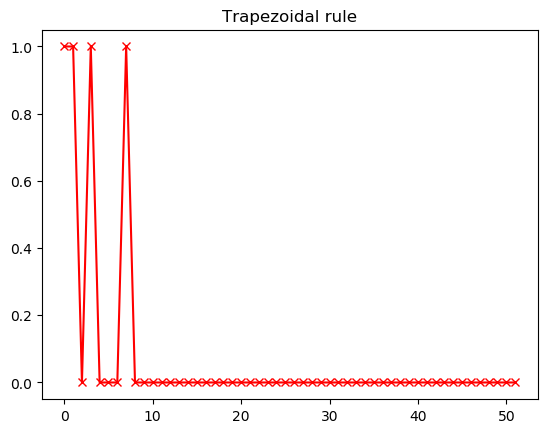

PyObject Text(0.5,1,u'Trapezoidal rule')

In [6]:
using PyPlot

a=0 #√2

f=θ->(cos.(8θ)).*(cos.(a*θ))

vals=Float64[trapezoidal_rule(f,0.,2π,k)/(2π) for k=1:52]

plot(vals,"rx-")
title("Trapezoidal rule")

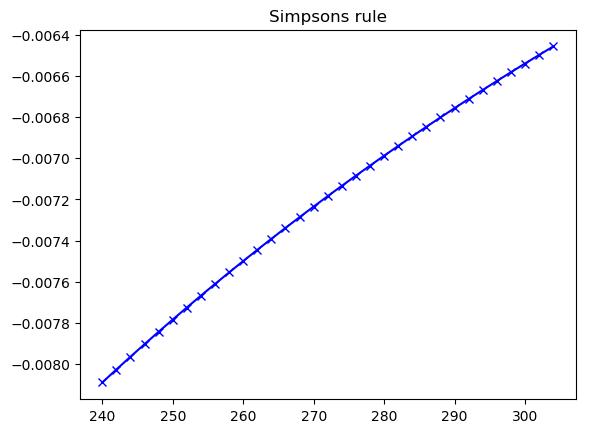

PyObject Text(0.5,1,u'Simpsons rule')

In [27]:

vals=Float64[Simpsons(θ->(cos.(8θ)).*(cos.(a*θ)),0.,2π,k)/(2π) for k=120:152]

plot( 2.*(120:152), vals,"bx-")
title("Simpsons rule")

## Observations

* Trapezoidal rule seems to compute the Fourier integrals *exactly* when $n$ is large enough

    $$f(x):= f0 + \sum_{k=1}^{N} f_k e^{ikx} \implies \int_0^{2\pi} f(x) dx = f_0 \equiv Q_N[f]$$

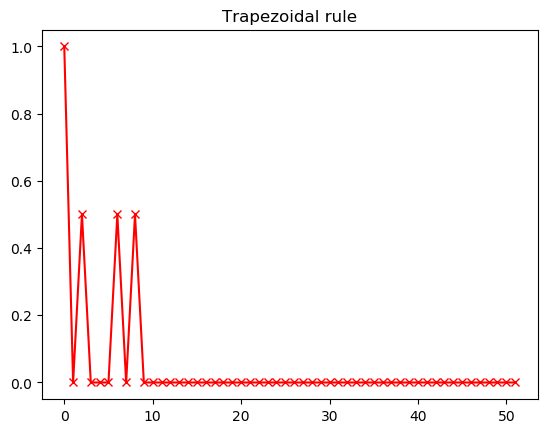

PyObject Text(0.5,1,u'Trapezoidal rule')

In [33]:
a=1.0

f=θ->(cos.(8θ)).*(cos.(a*θ))+sin(24θ)

vals=Float64[trapezoidal_rule(f,0.,2π,k)/(2π) for k=1:52]

plot(vals,"rx-")
title("Trapezoidal rule")

Before proving this, we do an experiment to get intuition.    Suppose we take two points.  Then we are sampling the function at precisely the peaks of $\cos 8 \theta$:

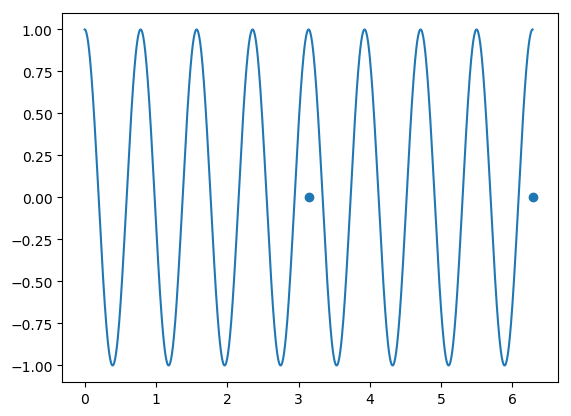

In [8]:
g=linspace(0.,2π,1000)

# plot the function
plot(g,cos.(8g))

# plot the grid
n=2
h=2π/n
scatter(linspace(h,2π,n),zeros(n));

Thus $\cos 8 \theta$ looks exactly like $1$ at the sample points, and its returning $1$.  For $n=3$, on the other hand, we cancel and get zero:

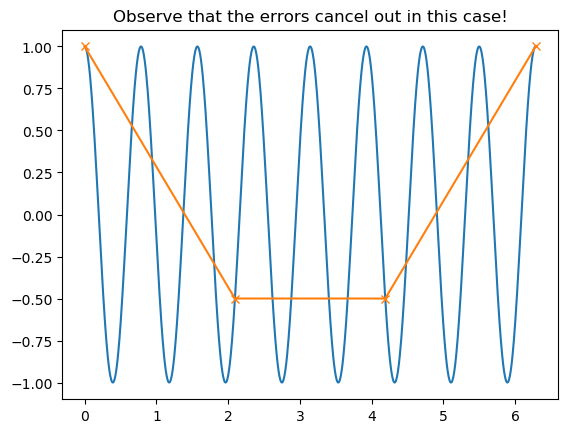

PyObject Text(0.5,1,u'Observe that the errors cancel out in this case!')

In [57]:
# plot the function
f=θ->cos.(8θ)

n=3
θ=linspace(0.,2π,n+1)
g=linspace(0.,2π,1000+1)

plot(g,f(g))
plot(θ,f(θ),"x-")
title("Observe that the errors cancel out in this case!")

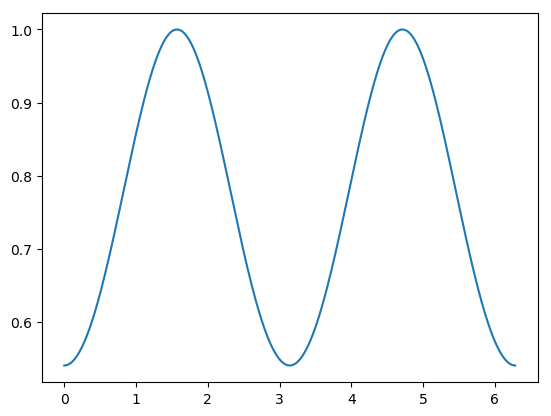

In [8]:
using PyPlot
using QuadGK


f=θ -> cos.(cos.(θ))

ex_soln=quadgk(f,0.,2π)[1]

g=linspace(0.,2π,1000+1)

plot(g,f(g));

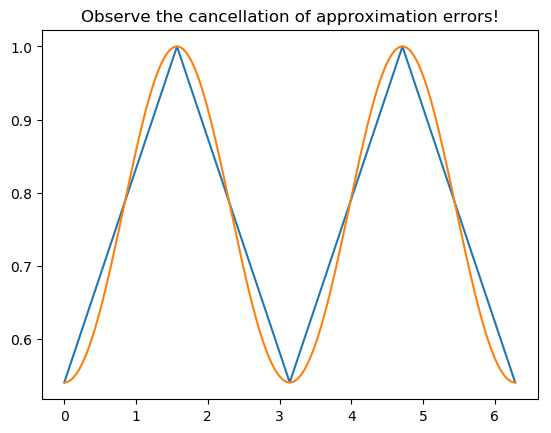

PyObject Text(0.5,1,u'Observe the cancellation of approximation errors!')

In [9]:
n=4
θ=linspace(0.,2π,n+1)

plot(θ,f(θ))
plot(g,f(g))
title("Observe the cancellation of approximation errors!")

In [19]:
trapezoidal_rule(f,0,2π, 3)-ex_soln

-0.00026311890910424296

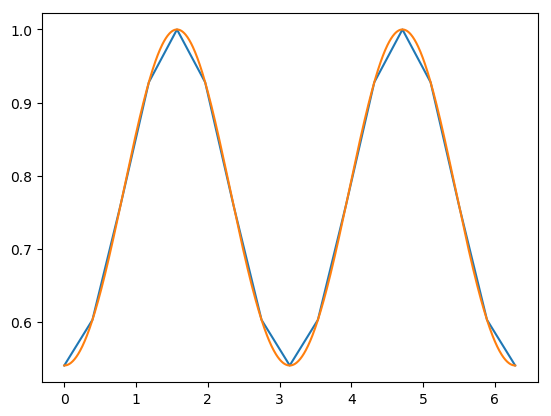

In [8]:
n=16
θ=linspace(0.,2π,n+1)

plot(θ,f(θ))
plot(g,f(g));

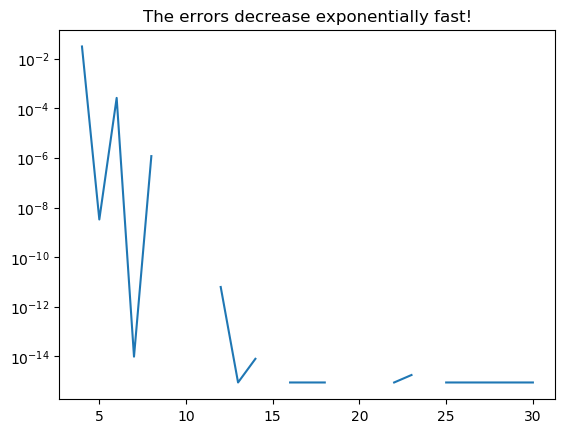

PyObject Text(0.5,1,u'The errors decrease exponentially fast!')

In [24]:
ns=4:30

errT=zeros(length(ns))

for k=1:length(ns)
    errT[k]=abs( trapezoidal_rule(f,0,2π, ns[k])-ex_soln    )
end

semilogy(ns,errT);
title("The errors decrease exponentially fast!")

In [25]:
errT

27-element Array{Float64,1}:
 0.0311235  
 3.30573e-9 
 0.000263119
 9.76996e-15
 1.18405e-6 
 0.0        
 3.30573e-9 
 0.0        
 6.2812e-12 
 8.88178e-16
 7.99361e-15
 0.0        
 8.88178e-16
 ⋮          
 0.0        
 8.88178e-16
 0.0        
 8.88178e-16
 1.77636e-15
 0.0        
 8.88178e-16
 8.88178e-16
 8.88178e-16
 8.88178e-16
 8.88178e-16
 8.88178e-16

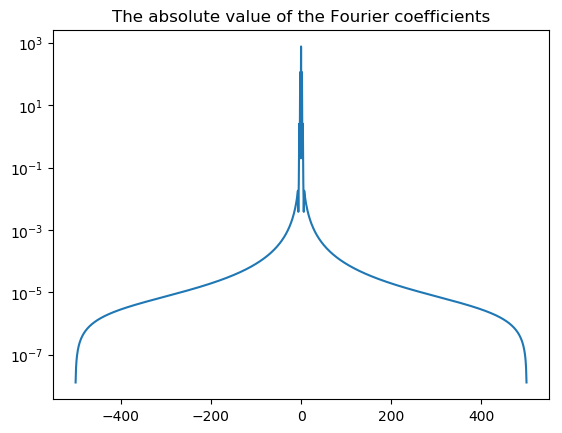

PyObject Text(0.5,1,u'The absolute value of the Fourier coefficients')

In [24]:
fhat=fft(f(g))

semilogy(-500:500,abs.(fftshift(fhat)))
title("The absolute value of the Fourier coefficients")

Proving that we get 1 for this example when we hit the frequencies just right is straightforward and intuitive.  Explaining why otherwise we get exactly zero requires some effort.  

# A simple sum of exponentials

Consider

$${1 \over 2 \pi} Q_n[e^{i k \theta}] = \sum_{j=1}^n e^{i k \theta_j}$$

for $\theta_j = {2 \pi \over n} j$.
We'll show the following result that will explain the phenomenon observed above:

**Theorem**  

$$\sum_{j=1}^n e^{i k \theta_j} = \begin{cases} n & k = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}$$

**Proof**

Consider $\omega \triangleq e^{i \theta_1} = e^{2 \pi i \over n}$.  This is an $n$th root of unity: $\omega^n = 1$.  Note that $e^{i \theta_j} =e^{2 \pi i j \over n}= \omega^j$.  

(Case 1) Suppose $k$ is a multiple of $n$, that is, $k = M n$ for an integer $M$.  Then we have 

$$\sum_{j=1}^n e^{i k \theta_j} = \sum_{j=1}^n \omega^{kj} = \sum_{j=1}^n ({\omega^{Mn}})^j =   \sum_{j=1}^n 1 = n$$

(Case 2)  Recall that

$$\sum_{j=0}^{n-1} z^j = {z^n-1 \over z-1}.$$

Then we have

$$\sum_{j=1}^n e^{i k \theta_j} = \sum_{j=1}^n (\omega^k)^j = {\omega^{kn} -1 \over \omega^k -1} = 0.$$

∎

**Corollary**

$${1 \over 2 \pi} Q_n[e^{i k \theta}]  = \begin{cases} 1 & k = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}$$

We can thus explain the previous observation:  for $f(\theta) = \cos 8 \theta$, we have

$$
\begin{align*}
\hat f_0^n &= {1 \over 2 \pi} Q_n[cos 8 \theta] = {1 \over 2 \pi} Q_n[{e^{i8 \theta} + e^{-i 8 \theta} \over 2} ]
= {1 \over 4 \pi} Q_n[e^{i8 \theta}] + {1 \over 4 \pi} Q_n[e^{-i8 \theta}] \cr
= \begin{cases}
1 & \hbox{$ 8$ is a multiple of $n$}\cr
0 & \hbox{otherwise}
\end{cases}
\end{align*}
$$

Next lecture we will use this approach to deduce a very simple formula for $\hat f_k^n$ in terms of the true Fourier coefficients.